# 1.Loading Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

# 2.Reading dataset

In [2]:
zomato_orgnl=pd.read_csv("zomato.csv")

**Showing 5 restaurant datas using head() function**

In [3]:
zomato_orgnl.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# 3.Data pre-processing

__Counting missing values for different columns__

In [4]:
zomato_orgnl.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

__Information on original zomato dataset__

In [5]:
zomato_orgnl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

 __From above, it is found that the column "dish_liked" has more than 50% values missing__

__Dropping the column "dish_liked", "phone", "url"  and saving the new dataset as "zomato"__

In [6]:
zomato=zomato_orgnl.drop(['url','dish_liked','phone'],axis=1)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

__Renaming "approx_cost(for two people)" ,listed_in(type) and listed_in(city) as they have multiple data-types__

In [7]:
zomato.rename({'approx_cost(for two people)': 'approx_cost_for_2_people',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost_for_2_people',
       'reviews_list', 'menu_item', 'listed_in_type', 'listed_in_city'],
      dtype='object')

__Converting "votes" and  "approx_cost_for_2_people" into numeric(int)__

__"votes" and  "approx_cost_for_2_people" have values like 1,000. 
So we will change them into pure numeric values.
<br>For this, we will use the lambda function__

In [8]:
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
zomato.votes = zomato.votes.astype('int')
zomato['approx_cost_for_2_people'] = zomato['approx_cost_for_2_people'].apply(remove_comma)

<ipython-input-8-9587e20051a6>:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x


__Confirming the data-types of "votes" and "approx_cost_for_2_people"__

In [9]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   address                   51717 non-null  object 
 1   name                      51717 non-null  object 
 2   online_order              51717 non-null  object 
 3   book_table                51717 non-null  object 
 4   rate                      43942 non-null  object 
 5   votes                     51717 non-null  int32  
 6   location                  51696 non-null  object 
 7   rest_type                 51490 non-null  object 
 8   cuisines                  51672 non-null  object 
 9   approx_cost_for_2_people  51371 non-null  float64
 10  reviews_list              51717 non-null  object 
 11  menu_item                 51717 non-null  object 
 12  listed_in_type            51717 non-null  object 
 13  listed_in_city            51717 non-null  object 
dtypes: flo

__Now we will convert "rate" into float__

__Checking unique values of "rate"__

In [10]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

__We remove the restaurent datas which has rate='NEW'__

In [11]:
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)

__Now we will remove '/5'__

In [12]:
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

<ipython-input-12-27cd71e35af5>:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x


In [13]:
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [14]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49440 entries, 0 to 49439
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   address                   49440 non-null  object 
 1   name                      49440 non-null  object 
 2   online_order              49440 non-null  object 
 3   book_table                49440 non-null  object 
 4   rate                      41665 non-null  float64
 5   votes                     49440 non-null  int32  
 6   location                  49419 non-null  object 
 7   rest_type                 49215 non-null  object 
 8   cuisines                  49395 non-null  object 
 9   approx_cost_for_2_people  49099 non-null  float64
 10  reviews_list              49440 non-null  object 
 11  menu_item                 49440 non-null  object 
 12  listed_in_type            49440 non-null  object 
 13  listed_in_city            49440 non-null  object 
dtypes: flo

__Now we see that 'rate' column has converted to float datatype__

__Now we will Label Encode the input variable columns into 0,1,2...__

In [15]:
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'approx_cost_for_2_people', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())

In [16]:
zomato_en['rate'] = zomato_en['rate'].fillna(zomato_en['rate'].mean())
zomato_en['approx_cost_for_2_people'] = zomato_en['approx_cost_for_2_people'].fillna(zomato_en['approx_cost_for_2_people'].mean())

In [17]:
zomato_en.isna().sum()

address                     0
name                        0
online_order                0
book_table                  0
rate                        0
votes                       0
location                    0
rest_type                   0
cuisines                    0
approx_cost_for_2_people    0
reviews_list                0
menu_item                   0
listed_in_type              0
listed_in_city              0
dtype: int64

# 4.STARTING REGRESSION PART<br>(PREDICTION)

__Checking for correlation among all the x(inputs)__

In [18]:
corr = zomato_en.corr(method='kendall')

<AxesSubplot:>

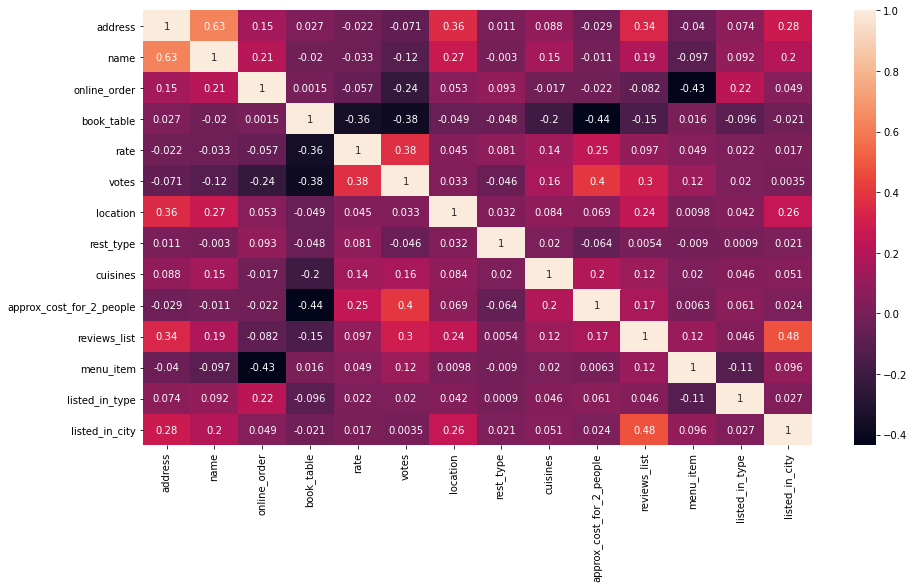

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [20]:
zomato_en.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost_for_2_people',
       'reviews_list', 'menu_item', 'listed_in_type', 'listed_in_city'],
      dtype='object')

__The highest correlation is between name and address which is 0.63 which is not of very much concern__ 
<br> __Splitting dataset into train & test__ 

In [21]:
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

In [23]:
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost_for_2_people,menu_item
2386,0,1,414,3,2,607,500.0,0
17957,1,1,210,77,0,5,700.0,0
6148,1,1,5,24,2,33,200.0,0
353,0,1,59,4,0,5,700.0,0
45525,0,1,123,41,4,298,600.0,863


In [24]:
y_train.head()

2386     4.1
17957    3.8
6148     3.4
353      3.6
45525    3.6
Name: rate, dtype: float64

## Applying LINEAR REGRESSION

In [25]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3021491658961638

**The following loop will find the best random state which will give the best accuracy in the range. Uncomment and run to see the random state.
P.S.- Random state might change as train_test_split splits the dataset randomly[](http://)**

In [27]:
'''reg_score=[]
import numpy as np
for j in range(1000):
    x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=j,test_size=0.1)
    lr=LinearRegression().fit(x_train,y_train)
    reg_score.append(lr.score(x_test,y_test))
K=reg_score.index(np.max(reg_score))
#Random state = K=353'''

'reg_score=[]\nimport numpy as np\nfor j in range(1000):\n    x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=j,test_size=0.1)\n    lr=LinearRegression().fit(x_train,y_train)\n    reg_score.append(lr.score(x_test,y_test))\nK=reg_score.index(np.max(reg_score))\n#Random state = K=353'

__With LINEAR REGRESSION, we are getting an  accuracy of  30 %__

## Applying DECISION TREE REGRESSION

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)

In [30]:
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)

In [31]:
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_test,y_predict)

0.839206447447719

In [34]:
'''from sklearn.tree import DecisionTreeRegressor
ts_score=[]
for j in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=j)
    dc=DecisionTreeRegressor().fit(x_train,y_train)
    ts_score.append(dc.score(x_test,y_test))
J= ts_score.index(np.max(ts_score))

J
#J=105'''

'from sklearn.tree import DecisionTreeRegressor\nts_score=[]\nfor j in range(1000):\n    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=j)\n    dc=DecisionTreeRegressor().fit(x_train,y_train)\n    ts_score.append(dc.score(x_test,y_test))\nJ= ts_score.index(np.max(ts_score))\n\nJ\n#J=105'

__With DECISION TREE REGRESSION, we are getting an  accuracy of  83 %__

## Applying RANDOM FOREST REGRESSION 

In [35]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)

In [36]:
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8402972029126435

In [38]:
'''rf_score=[]
for k in range(500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.01,random_state=k)
    dtc=RandomForestRegressor().fit(x_train,y_train)
    rf_score.append(dtc.score(x_test,y_test))
K= rf_score.index(np.max(rf_score))
K=329'''

'rf_score=[]\nfor k in range(500):\n    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.01,random_state=k)\n    dtc=RandomForestRegressor().fit(x_train,y_train)\n    rf_score.append(dtc.score(x_test,y_test))\nK= rf_score.index(np.max(rf_score))\nK=329'

__With RANDOM FOREST REGRESSION, we are getting an  accuracy of  84 % which is better than all three__

# 5.DATA VISUALIZATION

## i) No. of restaurants in a particular location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

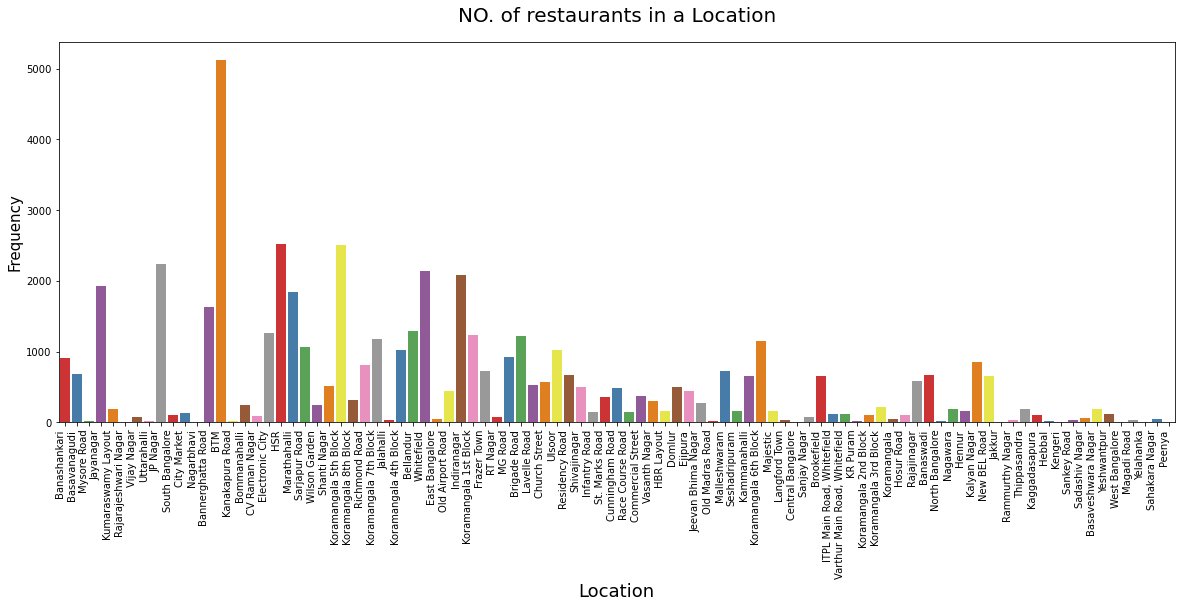

In [39]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato_orgnl, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

## ii) Frequency of different types of restaurants

Text(0.5, 1.0, 'Restaurant types')

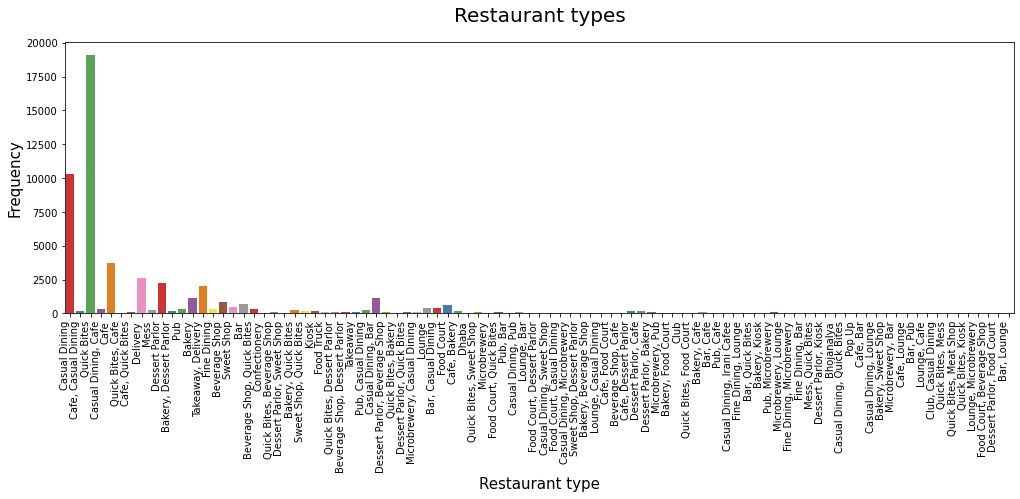

In [40]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato_orgnl, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

## iii) Most famous restaurant chains in Bengaluru

Text(0.5, 0, 'Number of outlets')

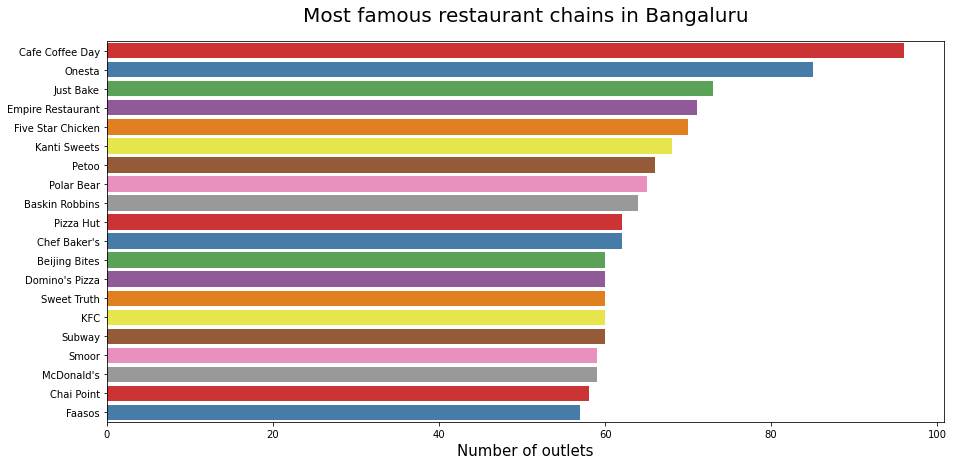

In [41]:
plt.figure(figsize=(15,7))
chains=zomato_orgnl['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

## iv) Number of restaurants taking online order or not

Text(0, 0.5, 'Frequency')

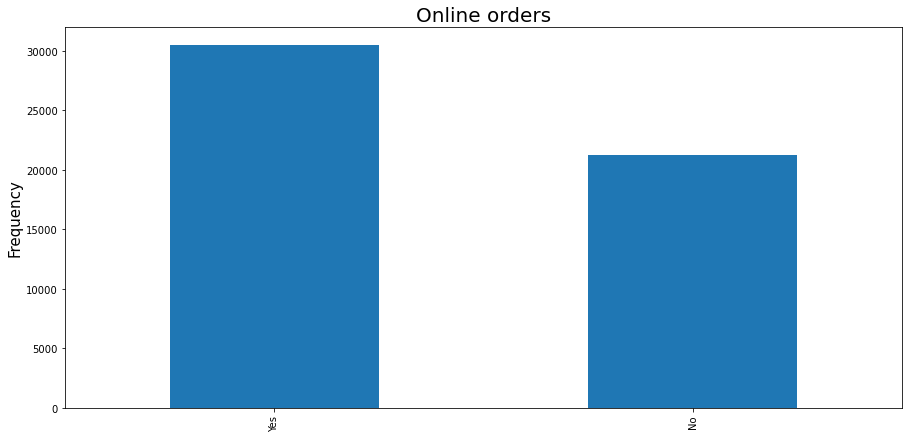

In [42]:
plt.figure(figsize=(15,7))
zomato_orgnl['online_order'].value_counts().plot.bar()
plt.title('Online orders', fontsize = 20)
plt.ylabel('Frequency',size = 15)

 ## v) Frequency of  restaurants allowing booking table or not

Text(0, 0.5, 'Frequency')

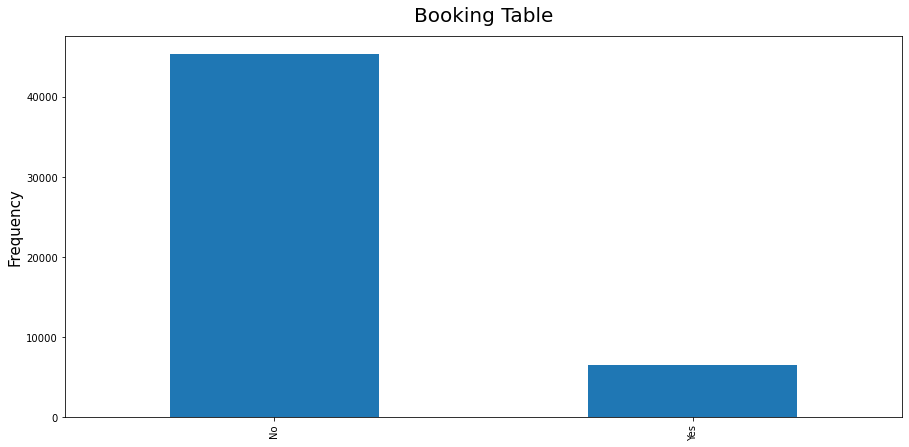

In [43]:
plt.figure(figsize=(15,7))
zomato_orgnl['book_table'].value_counts().plot.bar()
plt.title('Booking Table', fontsize = 20,pad=15)
plt.ylabel('Frequency', fontsize = 15)

## vi) Percentage of  restaurants according to their types

ValueError: Invalid string grayscale value '2'. Value must be within 0-1 range

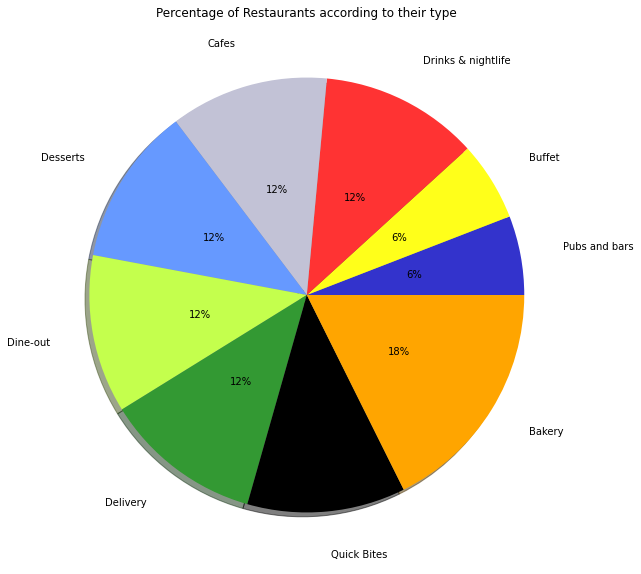

In [44]:
plt.figure(figsize=(10,10))
restaurantTypeCount=zomato_orgnl['rest_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6],
        restaurantTypeCount[7],
        restaurantTypeCount[8]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ','Quick Bites','Bakery']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933','black','orange']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their type", bbox={'facecolor':'2', 'pad':2})

## vii) Distribution of  restaurants according to approx cost for two people 

In [ ]:
fig, ax = plt.subplots(figsize=[15,7])
sns.distplot(zomato_en['approx_cost_for_2_people'],color="magenta")
ax.set_title('Approx cost for two people distribution',size=20,pad=15)
plt.xlabel('Approx cost for two people',size = 15)
plt.ylabel('Percentage of restaurants',size = 15)

## viii) Showing True rate vs Predicted rate

In [ ]:
plt.figure(figsize=(12,7))
preds_rf = RForest.predict(x_test)
plt.scatter(y_test,x_test.iloc[:,2],color="red")
plt.title("True rate vs Predicted rate",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Frequency',size = 15)
plt.scatter(preds_rf,x_test.iloc[:,2],color="green")

## ix) Restaurant rating distribution

In [ ]:
plt.figure(figsize=(15,8))
rating = zomato['rate']
plt.hist(rating,bins=20,color="red")
plt.title('Restaurant rating distribution', size = 20, pad = 15)
plt.xlabel('Rating',size = 15)
plt.ylabel('No. of restaurants',size = 15)

## x) Approx cost for 2 people distribution

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(zomato.approx_cost_for_2_people)
plt.title('Approx cost for 2 people distribution', size = 20, pad = 15)
plt.xlabel('Approx cost for 2 people',size = 15)
plt.ylabel('Density',size = 15)

**The approx cost for 2 people is around 300-400 INR**

## xi) Most popular cuisines of Bangalore

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'No. of restaurants')

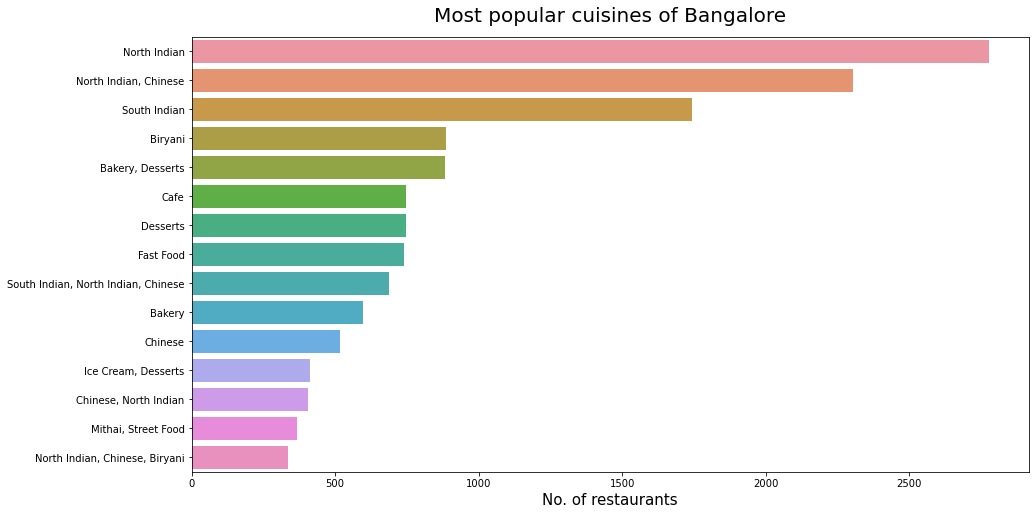

In [45]:
plt.figure(figsize=(15,8))
cuisines=zomato['cuisines'].value_counts()[:15]
sns.barplot(cuisines,cuisines.index)
plt.title('Most popular cuisines of Bangalore', size = 20, pad = 15)
plt.xlabel('No. of restaurants',size = 15)

   ## Please upvote this kernel if you liked it.   <br/>Thank You!<br/>:D